<a href="https://colab.research.google.com/github/Maxxx-VS/Machine_Learning/blob/main/Igor_testovoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RestorauntGroup - адрес магазина
UniqOrderId - Количество уникальных чеков, шт
DishDiscountSumInt.average - Сумма среднего чека, р
OpenDate.Typed - Дата
DishDiscountSumInt - Сумма продаж, р
DishAmountInt - Количество проданной продукции, шт
OrderItems - технологический столбец (количество строк фиксации продаж)

Задание- спрогнозировать сумму прода и количество штук продукции на год вперед.

In [1]:
# РЕШЕНИЕ №1 ЧЕРЕЗ АРИФМЕТИЧЕСКОЕ ВЫЧИСЛЕНИЕ СРЕДНЕГО ЗНАЧЕНИЯ В ДЕНЬ И ЭКСТРАПОЛЯЦИИ НА ГОД

In [4]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import torch

# загружаю ДФ
df = pd.read_csv('/content/danniepol2.csv', engine='python', encoding='utf-8')

# вывожу форму ДФ
print(df.shape)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: unexpected end of data

In [6]:
# удаляю технический стобец
del df['OrderItems']

# вывожу список всех столбцов
print(df.columns)

Index(['RestorauntGroup', 'UniqOrderId', 'DishDiscountSumInt.average',
       'OpenDate.Typed', 'DishDiscountSumInt', 'DishAmountInt', 'OrderItems'],
      dtype='object')


In [8]:
# даю нормальные имена столбцам
df = df.rename(columns={'RestorauntGroup': 'ADRESS',
                        'UniqOrderId': 'COUNT_CHEK',
                        'DishDiscountSumInt.average': 'SUM_AVERAGE_CHEK',
                        'OpenDate.Typed': 'DATE',
                        'DishDiscountSumInt': 'SUMMA_PROD',
                        'DishAmountInt': 'COUNT_PROD'})

In [11]:
print(df.head(1))

                           ADRESS  COUNT_CHEK  SUM_AVERAGE_CHEK        DATE  \
0  Ставрополь, ул. Доваторцев 75а        71.0            619.56  2024-02-25   

   SUMMA_PROD  COUNT_PROD  
0     43989.0       603.0  


In [12]:
# вывожу информацию о ДФ
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251899 entries, 0 to 251898
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251460 non-null  object 
 1   COUNT_CHEK        251898 non-null  float64
 2   SUM_AVERAGE_CHEK  251897 non-null  float64
 3   DATE              251896 non-null  object 
 4   SUMMA_PROD        251895 non-null  float64
 5   COUNT_PROD        251895 non-null  float64
dtypes: float64(4), object(2)
memory usage: 11.5+ MB
None


In [13]:
# заполняю пропуски медианными значениями
median_value = df['COUNT_CHEK'].median()
df['COUNT_CHEK'].fillna(median_value, inplace=True)

median_value = df['SUM_AVERAGE_CHEK'].median()
df['SUM_AVERAGE_CHEK'].fillna(median_value, inplace=True)

median_value = df['SUMMA_PROD'].median()
df['SUMMA_PROD'].fillna(median_value, inplace=True)

median_value = df['COUNT_PROD'].median()
df['COUNT_PROD'].fillna(median_value, inplace=True)

<ipython-input-13-81d973cc78e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COUNT_CHEK'].fillna(median_value, inplace=True)
<ipython-input-13-81d973cc78e3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [14]:
# удалаю строки со значением NaN
df = df.dropna(subset=['DATE'])
df = df.dropna(subset=['ADRESS'])

In [16]:
# еще раз вывожу информацию о ДФ
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 251458 entries, 0 to 251898
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251458 non-null  object 
 1   COUNT_CHEK        251458 non-null  float64
 2   SUM_AVERAGE_CHEK  251458 non-null  float64
 3   DATE              251458 non-null  object 
 4   SUMMA_PROD        251458 non-null  float64
 5   COUNT_PROD        251458 non-null  float64
dtypes: float64(4), object(2)
memory usage: 13.4+ MB
None


In [18]:
# считаю сколько уникальных дней (дат) собрано в ДФ
count_unicue_date = df["DATE"].unique()
print(len(count_unicue_date))

# повторно проверяю кол-во дней
df.nunique()

657


,0
ADRESS,697
COUNT_CHEK,540
SUM_AVERAGE_CHEK,73411
DATE,657
SUMMA_PROD,105324
COUNT_PROD,8055


In [20]:
# считаю сумму по полю, делю на количество уникальных дат и умножаю на 365
summ_prod_df = df['SUMMA_PROD'].sum()
count_prod_df = df['COUNT_PROD'].sum()

print(f'Прогноз годовой суммы прода = {round(summ_prod_df / 656 * 360, 2)} руб.')
print(f'Прогноз годового кол-ва штук = {round(count_prod_df / 656 * 360, 2)} шт.')

Прогноз годовой суммы прода = 7577312914.19 руб.
Прогноз годового кол-ва штук = 142173317.95 шт.


In [21]:
# РЕШЕНИЕ №2 ЧЕРЕЗ ПОЛНОСВЯЗНУЮ НС

In [27]:
# импортирую необходимые библиотеки
from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

In [4]:
# загружаю ДФ
data = pd.read_csv('/content/danniepol2.csv', engine='python', encoding='utf-8')

In [5]:
# даю нормальные имена столбцам
data = data.rename(columns={'RestorauntGroup': 'ADRESS',
                        'UniqOrderId': 'COUNT_CHEK',
                        'DishDiscountSumInt.average': 'SUM_AVERAGE_CHEK',
                        'OpenDate.Typed': 'DATE',
                        'DishDiscountSumInt': 'SUMMA_PROD',
                        'DishAmountInt': 'COUNT_PROD',
                        'OrderItems': 'TEHNOL'})

In [6]:
# вывожу информацию о ДФ
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252080 entries, 0 to 252079
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251641 non-null  object 
 1   COUNT_CHEK        252079 non-null  float64
 2   SUM_AVERAGE_CHEK  252078 non-null  float64
 3   DATE              252077 non-null  object 
 4   SUMMA_PROD        252077 non-null  float64
 5   COUNT_PROD        252077 non-null  float64
 6   TEHNOL            252077 non-null  float64
dtypes: float64(5), object(2)
memory usage: 13.5+ MB
None


In [7]:
# заполняю пропуски медианными значениями
median_value = data['COUNT_CHEK'].median()
data['COUNT_CHEK'].fillna(median_value, inplace=True)

median_value = data['SUM_AVERAGE_CHEK'].median()
data['SUM_AVERAGE_CHEK'].fillna(median_value, inplace=True)

median_value = data['SUMMA_PROD'].median()
data['SUMMA_PROD'].fillna(median_value, inplace=True)

median_value = data['COUNT_PROD'].median()
data['COUNT_PROD'].fillna(median_value, inplace=True)

median_value = data['TEHNOL'].median()
data['TEHNOL'].fillna(median_value, inplace=True)

<ipython-input-7-6658cb3559a4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['COUNT_CHEK'].fillna(median_value, inplace=True)
<ipython-input-7-6658cb3559a4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [8]:
# удалаю строки со значением NaN
data = data.dropna(subset=['DATE'])
data = data.dropna(subset=['ADRESS'])

In [9]:
print(data.head(1))

                           ADRESS  COUNT_CHEK  SUM_AVERAGE_CHEK        DATE  \
0  Ставрополь, ул. Доваторцев 75а        71.0            619.56  2024-02-25   

   SUMMA_PROD  COUNT_PROD  TEHNOL  
0     43989.0       603.0   319.0  


In [10]:
# вывожу информацию о ДФ
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 251639 entries, 0 to 252079
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251639 non-null  object 
 1   COUNT_CHEK        251639 non-null  float64
 2   SUM_AVERAGE_CHEK  251639 non-null  float64
 3   DATE              251639 non-null  object 
 4   SUMMA_PROD        251639 non-null  float64
 5   COUNT_PROD        251639 non-null  float64
 6   TEHNOL            251639 non-null  float64
dtypes: float64(5), object(2)
memory usage: 15.4+ MB
None


In [53]:
x_data = data[['COUNT_CHEK', 'SUM_AVERAGE_CHEK', 'COUNT_PROD', 'TEHNOL']]
y_data = data[['SUMMA_PROD']]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [54]:
mean = X_train.mean(axis=0) # Находим среднее значение по столбцам (по признакам)
X_train -= mean # вычитаем среднее значение для каждого признака
std = X_train.std(axis=0) # вычисляем стандартное отклонение
X_train /= std # для каждого признака полученная разность делится на стандартное отклонение

# повторяем процедуру для тестовых данных
y_train -= mean
y_train /= std

In [55]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(4,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


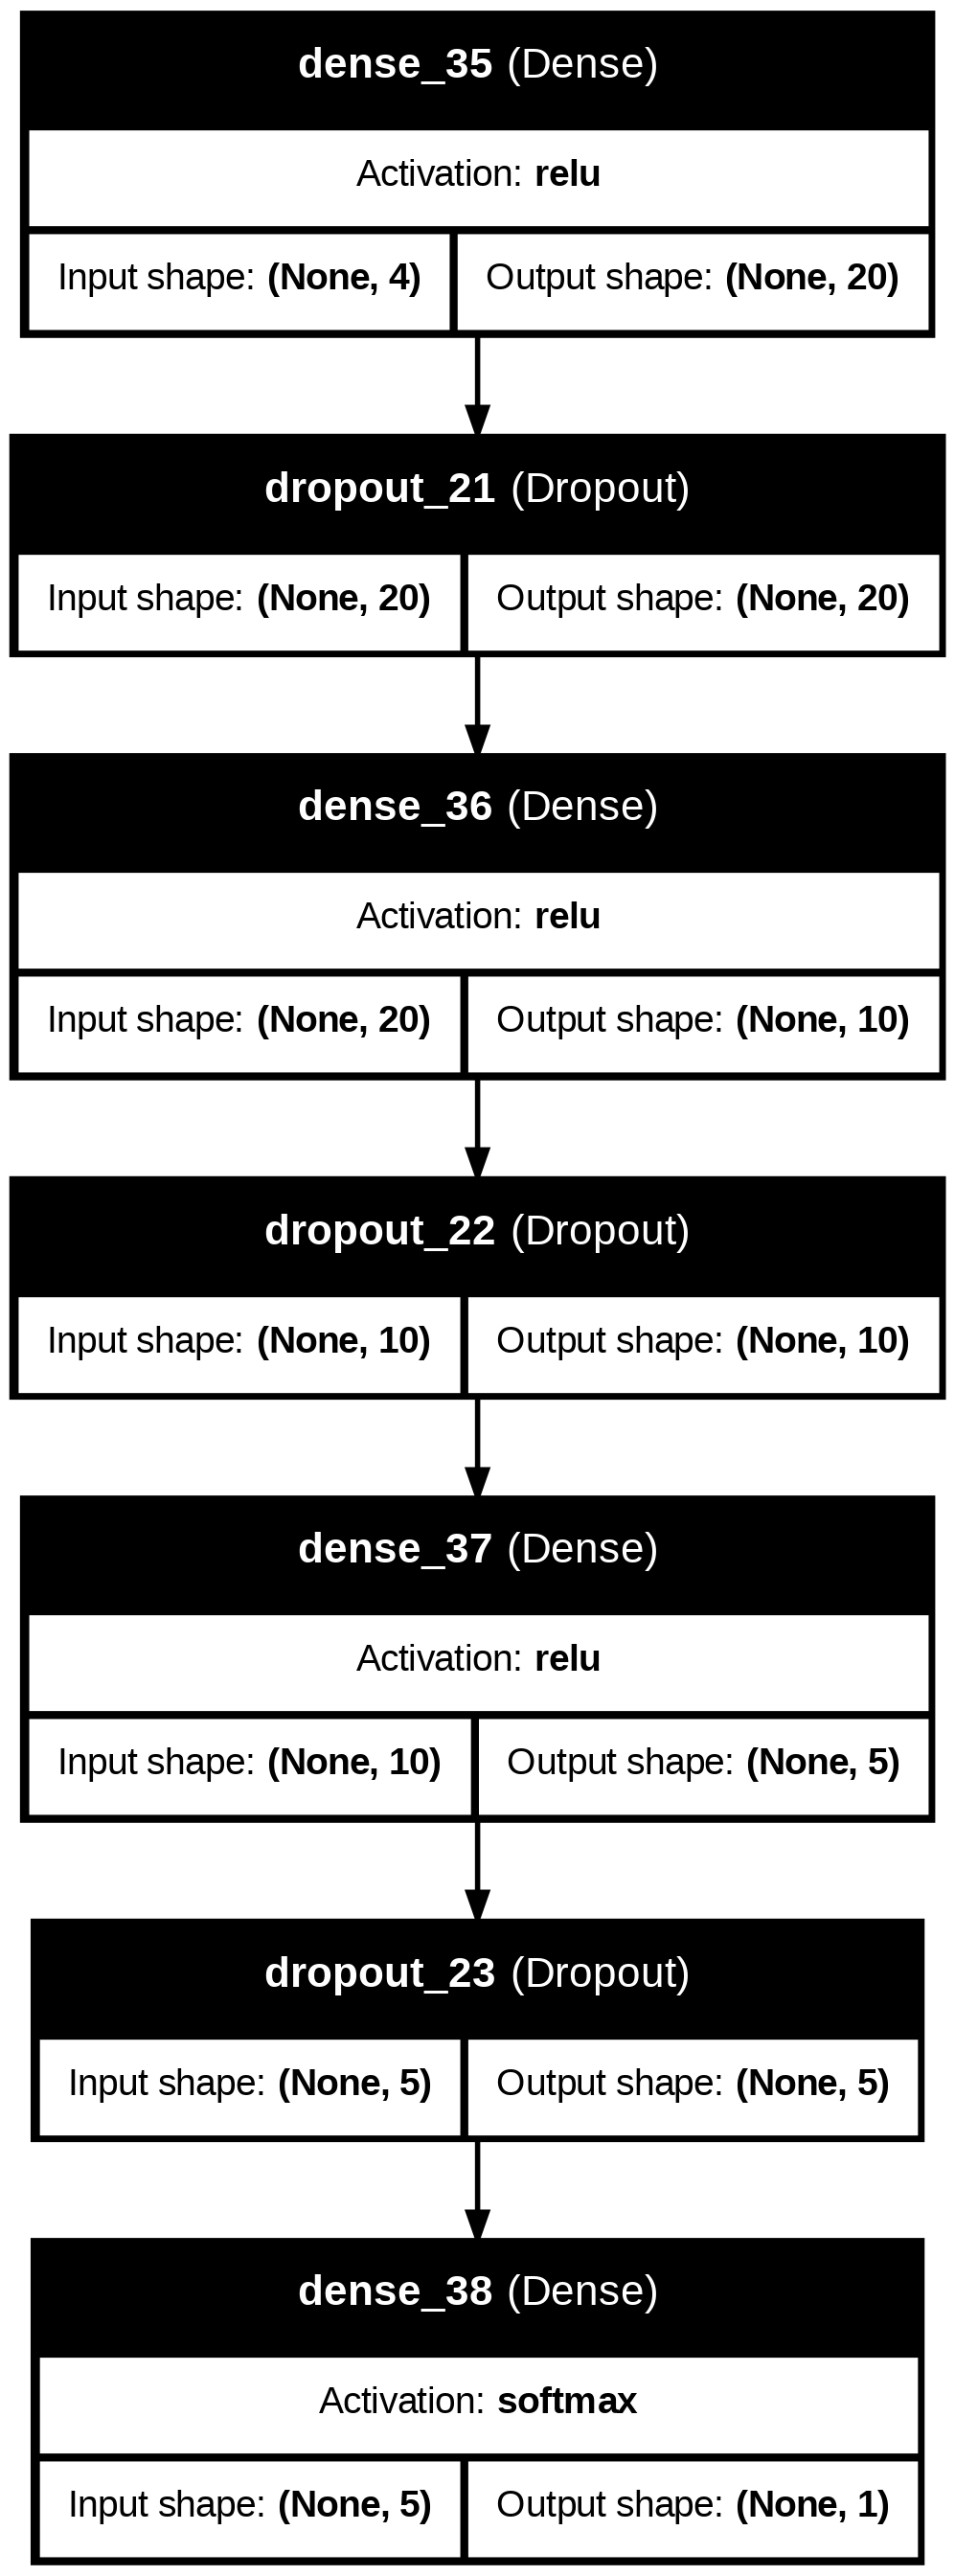

In [56]:
from keras import utils
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [60]:
EPOCHS = 10
BATCH_SIZE = 256

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.05)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


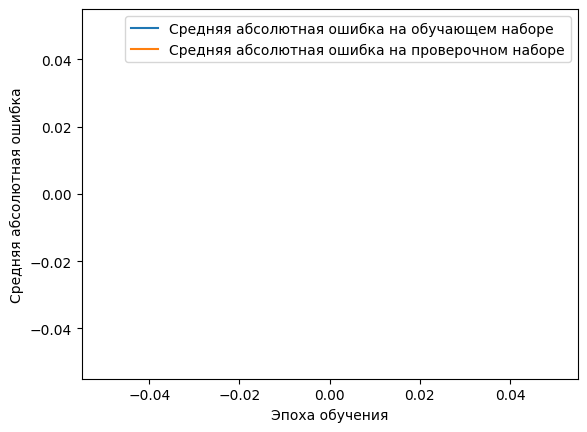

In [58]:
# Отрисовка графиков
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [47]:
Y_pred = model.predict(X_test)
print(np.abs(Y_pred - y_test).mean())

787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
SUMMA_PROD    54988.617611
dtype: float64


In [34]:
test_accuracy = model.evaluate(X_test, y_test)
print(round(test_accuracy[1], 2))

787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4484328448.0000 - mae: 54682.2578
54988.64


In [48]:
x_data = data[['COUNT_CHEK', 'SUM_AVERAGE_CHEK', 'SUMMA_PROD', 'TEHNOL']]
y_data = data[['COUNT_PROD']]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(4,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='softmax'))

EPOCHS = 10
BATCH_SIZE = 256

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.05)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


831/841 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2472407.7500 - mae: 1030.6105

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2474225.0000 - mae: 1030.5956 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 2/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2656104.0000 - mae: 1030.0837 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 3/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2383120.7500 - mae: 1026.6985 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 4/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1890308.8750 - mae: 1029.3032 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 5/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2431535.7500 - mae: 1031.8231 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 6/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2946501.2500 - mae: 1030.1431 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 7/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2736744.5000 - mae: 1030.9882 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 8/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss:

In [52]:
Y_pred = model.predict(X_test)
aaa = round(np.abs(Y_pred - y_test).mean(), 2)
print(aaa)

787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
COUNT_PROD    1023.81
dtype: float64


In [50]:
test_accuracy = model.evaluate(X_test, y_test)
print(round(test_accuracy[1], 2))

787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1660675.2500 - mae: 1018.0146
1023.81
